In [1]:
import tensorflow as tf

from tensorflow.python.client import device_lib

device_lib.list_local_devices()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9925966238014615076,
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2720386492739128585
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:XLA_GPU:1"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7019348420449066528
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:XLA_GPU:2"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10274927795234819452
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:XLA_GPU:3"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14342090860283363602
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9270931210688185270
 physical_device_desc: "device: XLA_CPU device",


In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing import image

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf

with tf.device('/gpu:1'):
    train_path = './data/vgg16_dataset/train_new'
    test_path = './data/vgg16_dataset/validation'

    trdata = ImageDataGenerator()
    traindata = trdata.flow_from_directory(directory=train_path, target_size=(224,224))
    tsdata = ImageDataGenerator()
    testdata = tsdata.flow_from_directory(directory=test_path, target_size=(224,224))

    vggmodel = VGG16(weights='imagenet', include_top=True)
    vggmodel.summary()


Found 23620 images belonging to 2 classes.
Found 4730 images belonging to 2 classes.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
________________________________________________________

In [3]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False
    
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(vggmodel.input,predictions)

In [4]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
with tf.device('/gpu:0'):
    checkpoint = ModelCheckpoint("vgg16_2.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
    early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='max')

    model_final.fit_generator(generator= traindata, steps_per_epoch= 25, epochs= 100, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])
    model_final.save_weights("vgg16_2.h5")

Epoch 1/100
24/25 [===========================>..] - ETA: 0s - loss: 0.2934 - acc: 0.8789
Epoch 00001: val_acc improved from -inf to 1.00000, saving model to vgg16_2.h5
25/25 [==============================] - 12s 489ms/step - loss: 0.2839 - acc: 0.8825 - val_loss: 0.0075 - val_acc: 1.0000
Epoch 2/100
24/25 [===========================>..] - ETA: 0s - loss: 0.1266 - acc: 0.9570
Epoch 00002: val_acc did not improve from 1.00000
25/25 [==============================] - 4s 168ms/step - loss: 0.1216 - acc: 0.9588 - val_loss: 0.0082 - val_acc: 1.0000
Epoch 3/100
24/25 [===========================>..] - ETA: 0s - loss: 0.1142 - acc: 0.9609
Epoch 00003: val_acc did not improve from 1.00000
25/25 [==============================] - 4s 174ms/step - loss: 0.1138 - acc: 0.9588 - val_loss: 0.0082 - val_acc: 1.0000
Epoch 4/100
24/25 [===========================>..] - ETA: 0s - loss: 0.1301 - acc: 0.9609
Epoch 00004: val_acc did not improve from 1.00000
25/25 [==============================] - 4s 168

Epoch 32/100
24/25 [===========================>..] - ETA: 0s - loss: 0.0133 - acc: 0.9974
Epoch 00032: val_acc did not improve from 1.00000
25/25 [==============================] - 4s 172ms/step - loss: 0.0128 - acc: 0.9975 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 33/100
24/25 [===========================>..] - ETA: 0s - loss: 0.0113 - acc: 0.9987
Epoch 00033: val_acc did not improve from 1.00000
25/25 [==============================] - 4s 167ms/step - loss: 0.0110 - acc: 0.9987 - val_loss: 0.0084 - val_acc: 1.0000
Epoch 34/100
24/25 [===========================>..] - ETA: 0s - loss: 0.0177 - acc: 0.9961
Epoch 00034: val_acc did not improve from 1.00000
25/25 [==============================] - 4s 173ms/step - loss: 0.0171 - acc: 0.9962 - val_loss: 0.0094 - val_acc: 1.0000
Epoch 35/100
24/25 [===========================>..] - ETA: 0s - loss: 0.0216 - acc: 0.9948
Epoch 00035: val_acc did not improve from 1.00000
25/25 [==============================] - 4s 169ms/step - loss: 0.0219 - a

In [9]:
!ls vgg16_2.h5 # 학습 모델 저장

vgg16_2.h5


In [ ]:
# model.load_weights('vgg16_2.h5')

In [10]:
import pandas as pd
import os
import numpy as np

test_dataset = os.listdir("./data/vgg16_dataset/test1")
df=pd.DataFrame({'id':[i for i in range(len(test_dataset))], 'label':[0 for i in range(len(test_dataset))]})

pd.options.mode.chained_assignment = None  # default='warn'

# 전체 테스트셋 중 30개만 분류
for e,i in enumerate(test_dataset[:30]):
    print(i)
    output=[]
    img = image.load_img(os.path.join("./data/vgg16_dataset/test1",i),target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = model_final.predict(img)
#     print(output)
    if output[0][0] > output[0][1]:
#         print("cat")
        df["id"][e]=i
        df["label"][e]="cat"
    else:
#         print('dog')
        df["id"][e]=i
        df["label"][e]="dog"

8241.jpg
9337.jpg
10939.jpg
7855.jpg
5272.jpg
3918.jpg
2930.jpg
282.jpg
5250.jpg
12162.jpg
9313.jpg
3495.jpg
6250.jpg
10976.jpg
5344.jpg
7986.jpg
10624.jpg
9606.jpg
7746.jpg
1444.jpg
5195.jpg
7446.jpg
8484.jpg
7428.jpg
4831.jpg
11918.jpg
3130.jpg
8222.jpg
11970.jpg
10401.jpg


cat


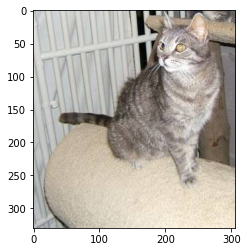

cat


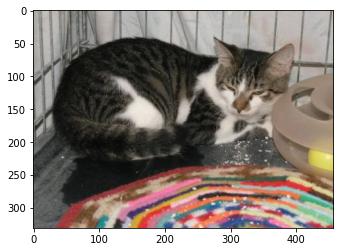

cat


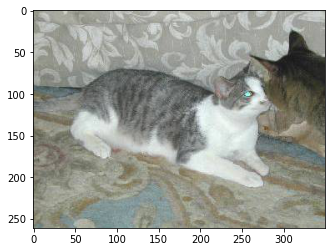

cat


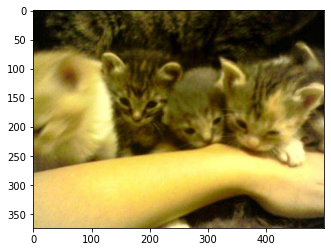

cat


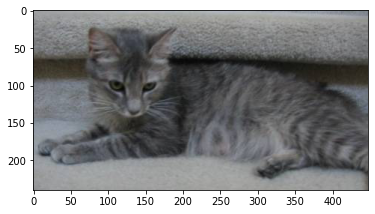

dog


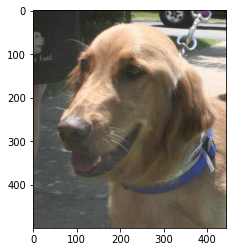

cat


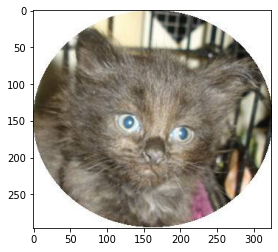

dog


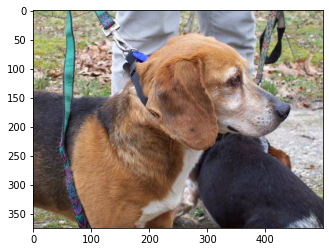

cat


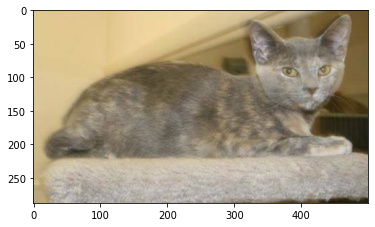

cat


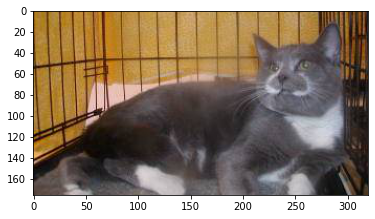

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(10):
    img = df.iloc[i]['id']
    label = df.iloc[i]['label'] 
    print(label)
    image_show = mpimg.imread(os.path.join('./data/vgg16_dataset/test1/', img))
    plt.imshow(image_show)
    plt.show()